In [1]:
# The column headings of the datasets were all edited with initial capitals and an underscore separating compound words.
# Load the data sets from my desktop.
import pandas as pd

# Load COVID-19 data from the desktop
day_wise = pd.read_csv(r'C:\Users\HP\Desktop\day_wise.csv')
full_grouped = pd.read_csv(r'C:\Users\HP\Desktop\full_grouped.csv')
worldometer_data = pd.read_csv(r'C:\Users\HP\Desktop\worldometer_data.csv')
country_wise_latest = pd.read_csv(r'C:\Users\HP\Desktop\country_wise_latest.csv')
covid_19_clean_complete = pd.read_csv(r'C:\Users\HP\Desktop\covid_19_clean_complete.csv')
usa_county_wise = pd.read_csv(r'C:\Users\HP\Desktop\usa_county_wise.csv')
print(day_wise.head())



        Date  Confirmed  Deaths  Recovered  Active  New_Cases  New_Deaths  \
0  1/22/2020        555      17         28     510          0           0   
1  1/23/2020        654      18         30     606         99           1   
2  1/24/2020        941      26         36     879        287           8   
3  1/25/2020       1434      42         39    1353        493          16   
4  1/26/2020       2118      56         52    2010        684          14   

   New_Recovered  Deaths_100_Cases  Recovered_100_Cases  Deaths_100_Recovered  \
0              0              3.06                 5.05                 60.71   
1              2              2.75                 4.59                 60.00   
2              6              2.76                 3.83                 72.22   
3              3              2.93                 2.72                107.69   
4             13              2.64                 2.46                107.69   

   No_of_Countries  
0                6  
1       

In [2]:
# Data Cleaning. Check for missing values: Inspect missing data and decide how to handle it.

print(day_wise.isnull().sum())
print(full_grouped.isnull().sum())

# Fill missing values or forward fill
day_wise.fillna(0, inplace=True)
full_grouped.ffill(inplace=True)




Date                    0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
New_Cases               0
New_Deaths              0
New_Recovered           0
Deaths_100_Cases        0
Recovered_100_Cases     0
Deaths_100_Recovered    0
No_of_Countries         0
dtype: int64
Date              0
Country_Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New_Cases         0
New_Deaths        0
New_Recovered     0
WHO_Region        0
dtype: int64


In [3]:
# Remove duplicates: Ensure there are no duplicate records.

day_wise.drop_duplicates(inplace=True)

# Standardize date formats: Ensure the date columns are in the correct format.
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
print(day_wise.head())

        Date  Confirmed  Deaths  Recovered  Active  New_Cases  New_Deaths  \
0 2020-01-22        555      17         28     510          0           0   
1 2020-01-23        654      18         30     606         99           1   
2 2020-01-24        941      26         36     879        287           8   
3 2020-01-25       1434      42         39    1353        493          16   
4 2020-01-26       2118      56         52    2010        684          14   

   New_Recovered  Deaths_100_Cases  Recovered_100_Cases  Deaths_100_Recovered  \
0              0              3.06                 5.05                 60.71   
1              2              2.75                 4.59                 60.00   
2              6              2.76                 3.83                 72.22   
3              3              2.93                 2.72                107.69   
4             13              2.64                 2.46                107.69   

   No_of_Countries  
0                6  
1       

In [4]:
# Feature Engineering. Create additional features that may be helpful for predictive models.

# Daily growth rates (percentage change in confirmed cases and deaths):
day_wise['daily_growth_cases'] = day_wise['Confirmed'].pct_change()
day_wise['daily_growth_deaths'] = day_wise['Deaths'].pct_change()


# Mortality ratio:
day_wise['mortality_ratio'] = day_wise['Deaths'] / day_wise['Confirmed']

# Cases per million:
worldometer_data['cases_per_million'] = worldometer_data['Total_Cases'] / worldometer_data['Population'] * 1_000_000


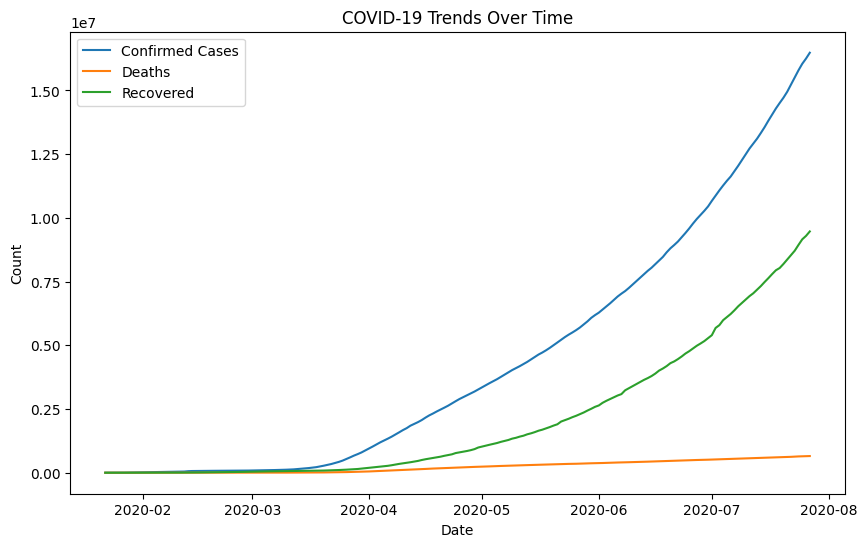

In [5]:
# Exploratory Data Analysis (EDA). In this step, the data will be explored visually and trends identified.
# Trend of COVID-19 cases over time. Plot the trends for confirmed cases, deaths, and recoveries.

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(day_wise['Date'], day_wise['Confirmed'], label='Confirmed Cases')
plt.plot(day_wise['Date'], day_wise['Deaths'], label='Deaths')
plt.plot(day_wise['Date'], day_wise['Recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Trends Over Time')
plt.legend()
plt.show()



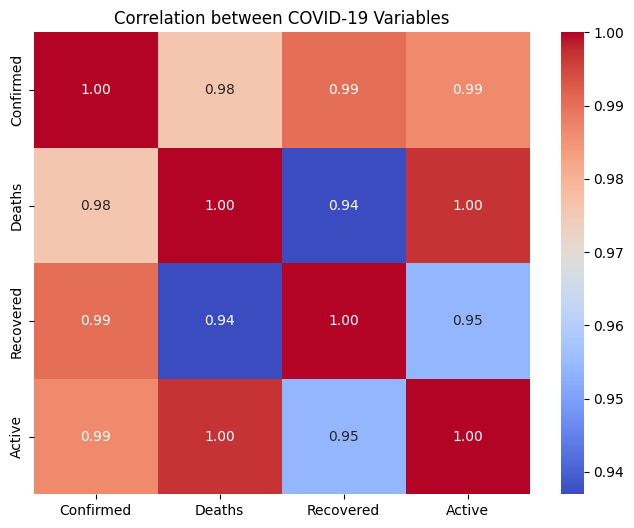

In [6]:
# Investigate correlations between variables

#Use a correlation matrix to identify relationships between different variables (e.g., confirmed, deaths, recovered).


import seaborn as sns

corr = day_wise[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between COVID-19 Variables')
plt.show()


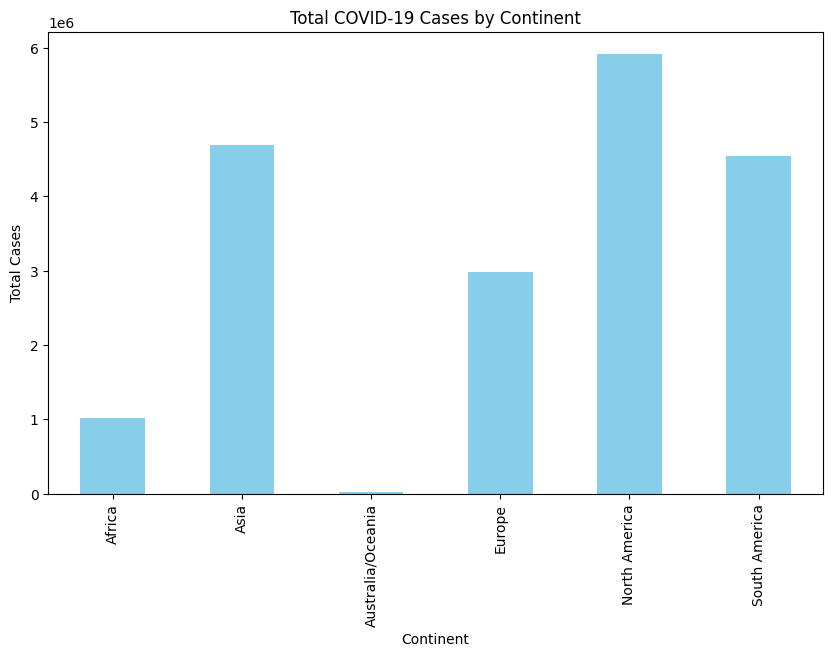

In [7]:

# Investigate demographic insights

#Explore the impact of demographics (e.g., continent, population) on COVID-19 trends.


continent_cases = worldometer_data.groupby('Continent')['Total_Cases'].sum()
continent_cases.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total COVID-19 Cases by Continent')
plt.ylabel('Total Cases')
plt.xlabel('Continent')
plt.show()


Importing plotly failed. Interactive plots will not work.
21:34:07 - cmdstanpy - INFO - Chain [1] start processing
21:34:10 - cmdstanpy - INFO - Chain [1] done processing


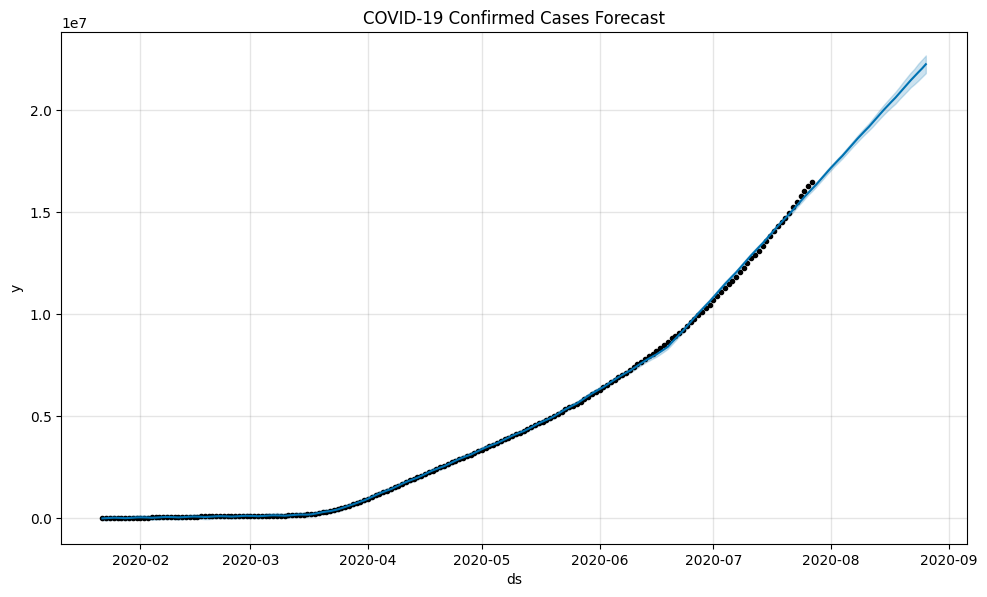

In [8]:
from prophet import Prophet

# Prepare data for Prophet
prophet_data = day_wise[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Fit the model
model = Prophet()
model.fit(prophet_data)

# Make future predictions (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('COVID-19 Confirmed Cases Forecast')
plt.show()


In [10]:
# Classification Models. You can also build a classification model to predict whether a region is high-risk (e.g., if confirmed cases exceed a threshold).

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a high-risk label based on case counts
day_wise['high_risk'] = (day_wise['Confirmed'] > 10000).astype(int)

# Select features and target
X = day_wise[['Confirmed', 'Deaths', 'Recovered', 'daily_growth_cases']]
y = day_wise['high_risk']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        36

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data (replace with your actual data)
X = np.array([[i] for i in range(10)])  # Features
y = np.array([2*i + 1 for i in range(10)])  # Target variable (e.g., a simple linear relationship)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Example model (e.g., a simple linear regression model)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 1.0255800994045674e-15


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


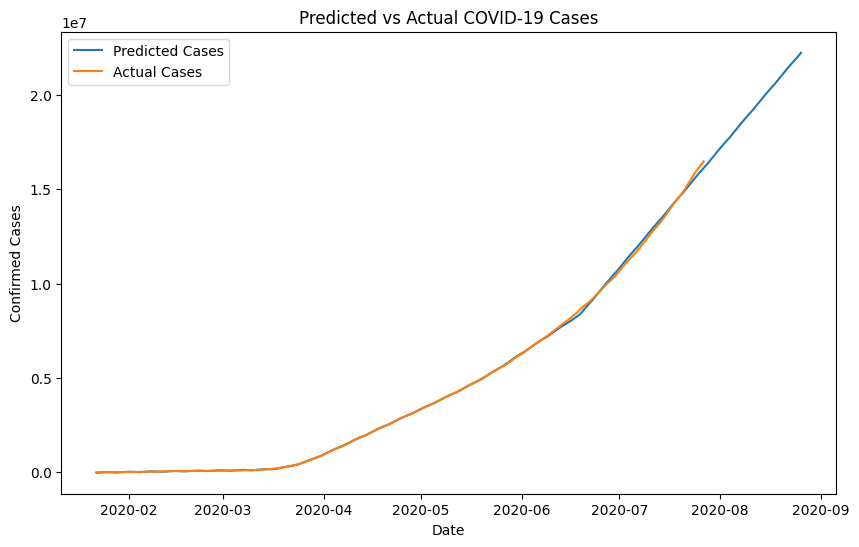

In [12]:
 #Data Visualization and Reporting

# Model Visualizations. For time-series models, plot predicted vs. actual values.


# For Prophet predictions
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Cases')
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Predicted vs Actual COVID-19 Cases')
plt.legend()
plt.show()
